# Ejercicio 29
Mediante un eje que acciona una rueda de paletas se entrega trabajo al aire contenido en B hasta que éste alcanza 500°C. Determine el trabajo suministrado por el eje.

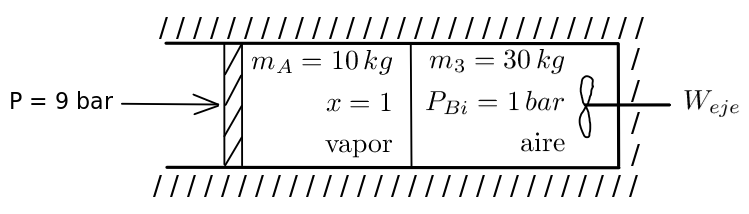

## Solución

In [1]:
# Datos:
P_A = 9e5 # [Pa]
m_vapor = 10 # [kg]
x = 1
T_2 = 500 + 273.15 # [K]
m_aire = 30 # [kg]
cv = 0.7176e3 # [J/(kg·K)]  (aire, a volumen constante)

In [2]:
!pip install CoolProp
import CoolProp.CoolProp as cp

     |████████████████████████████████| 4.2 MB 5.1 MB/s 


Averiguamos la temperatura en A y como el seperador es diatérmico la temperatura en B debe ser igual.

In [3]:
T_1 = cp.PropsSI('T','P',P_A,'Q',x,'Water')

In [19]:
#@title 
print('T_1 = %.2f [K]'%T_1)
print('t_1 = %.2f [°C]'%(T_1 - 273.15))

T_1 = 448.50 [K]
t_1 = 175.35 [°C]


* Variación energía interna del aire

$$ \Delta U_{aire} = m_{aire} c_v (T_2 - T_1) $$

In [5]:
DU_aire = m_aire*cv*(T_2 - T_1)

In [6]:
#@title 
print('Variación energía interna del aire (A)')
print('DU_aire = %.2f [kJ]'%(DU_aire/1000))

Variación energía interna del aire (A)
DU_aire = 6989.06 [kJ]


* Variación energía interna del vapor

$$ \Delta U_{vapor} = m_{vapor} (u_2 - u_1) $$

In [7]:
u_1 = cp.PropsSI('U','P',P_A,'Q',x,'Water')
u_2 = cp.PropsSI('U','P',P_A,'T',T_2,'Water')

In [8]:
#@title 
print('u_1 = %.2f [kJ/kg]'%(u_1/1000))
print('u_2 = %.2f [kJ/kg]'%(u_2/1000))

u_1 = 2579.64 [kJ/kg]
u_2 = 3125.79 [kJ/kg]


In [9]:
DU_vapor = m_vapor*(u_2 - u_1)

In [10]:
#@title 
print('Variación energía interna del vapor (B)')
print('DU_vapor = %.2f [kJ]'%(DU_vapor/1000))

Variación energía interna del vapor (B)
DU_vapor = 5461.57 [kJ]


* Variación energía interna total

$$ \Delta U = \Delta U_{aire} + \Delta U_{vapor} $$

In [11]:
DU = DU_aire + DU_vapor

In [12]:
#@title 
print('Variación energía interna total')
print('DU = %.2f [kJ]'%(DU/1000))

Variación energía interna total
DU = 12450.62 [kJ]


* Trabajo total
$$ Q = \Delta U + W \qquad \rightarrow \qquad Q = 0 $$

Entonces:
$$ W_T = - \Delta U $$

In [13]:
W_T = -DU

* Trabajo por variación de volumen

$$ W_{\Delta V} = P_p \, m_{vapor} \, (v_2 - v_1) $$

In [14]:
v_1 = 1 / cp.PropsSI('D','P',P_A,'Q',x,'Water')
v_2 = 1 / cp.PropsSI('D','P',P_A,'T',T_2,'Water')

In [15]:
W_DV = P_A*m_vapor*(v_2 - v_1)

In [16]:
#@title
print('Trabajo por variación de volumen:')
print('W_DV = %.2f [kJ]'%(W_DV/1000))

Trabajo por variación de volumen:
W_DV = 1609.87 [kJ]


* Trabajo en el eje

$$ W_{eje} = W_T - W_{\Delta V} $$

In [17]:
W_eje = W_T - W_DV

In [18]:
#@title 
print('Trabajo en el eje:')
print('W_eje = %.2f [kJ]'%(W_eje/1000))

Trabajo en el eje:
W_eje = -14060.49 [kJ]
